# Employee Attrition for Healthcare

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
sns.set_context("notebook")

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [7]:
data = pd.read_csv('watson_healthcare_modified.csv')
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2




Lets find out more about the data by running some tests



In [8]:
data.shape

(1676, 35)

In [9]:
data.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [11]:
data.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
data['Attrition'].value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

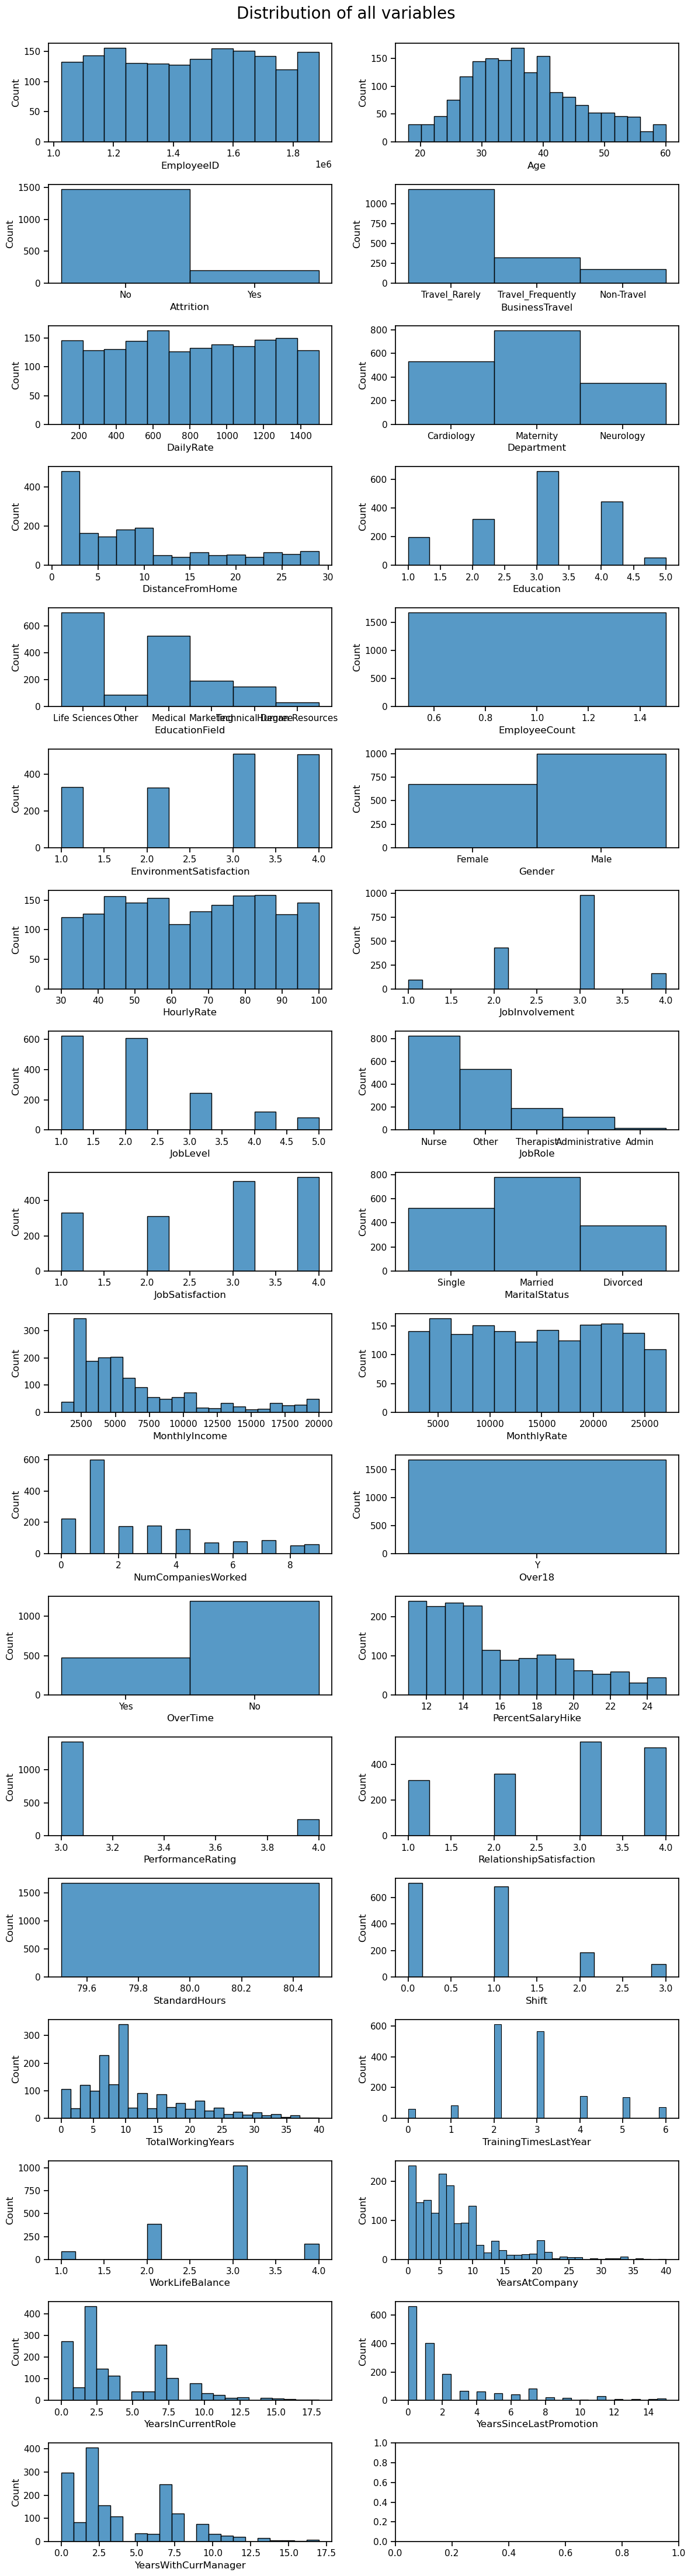

In [13]:
ncols = 2
nrows = np.ceil(len(data.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(data.columns, axs.flatten()):
    sns.histplot(data, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

In [96]:
data.drop(["EmployeeID","EmployeeCount","Over18","StandardHours","PerformanceRating"],axis = 1,inplace = True)

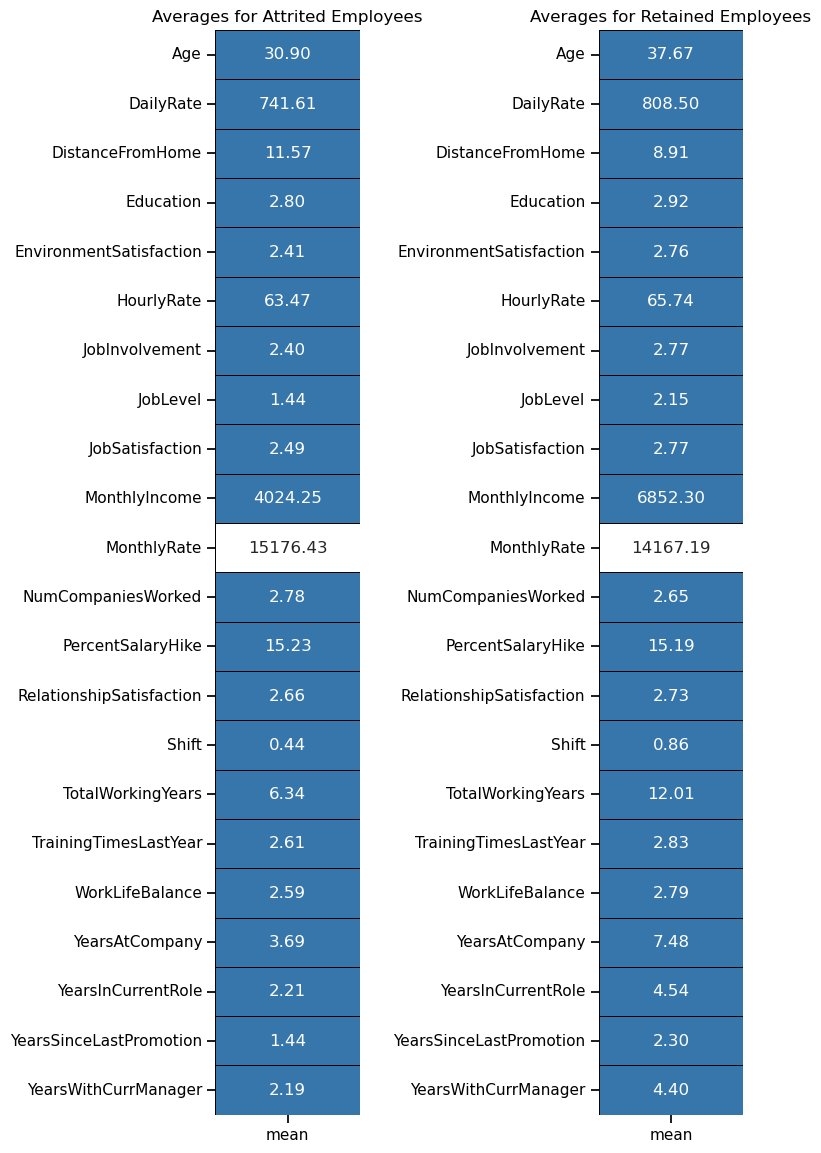

In [97]:
yes = data[data['Attrition'] == 'Yes'].describe().T
no = data[data['Attrition'] == 'No'].describe().T

colors = ['#3776ab','white']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (8,12))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']], annot = True, cmap = colors, linewidths = .5, linecolor = 'black', cbar = False, fmt = '.2f')
plt.title('Averages for Attrited Employees');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']], annot = True, cmap = colors, linewidths = .5, linecolor = 'black', cbar = False, fmt = '.2f')
plt.title('Averages for Retained Employees');

fig.tight_layout(pad = 2)

## Notes from categorical analysis
* Older employees are less likely to leave
* Longer tenured employees are less likely to leave
* Lower level employees with less income are more likely to leave

In [99]:
discrete = data.select_dtypes(include=['int64'])
categories = data.select_dtypes(include=['object'])

In [100]:
categories

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,No,Travel_Rarely,Cardiology,Life Sciences,Female,Nurse,Single,Yes
1,No,Travel_Frequently,Maternity,Life Sciences,Male,Other,Married,No
2,Yes,Travel_Rarely,Maternity,Other,Male,Nurse,Single,Yes
3,No,Travel_Frequently,Maternity,Life Sciences,Female,Other,Married,Yes
4,No,Travel_Rarely,Maternity,Medical,Male,Nurse,Married,No
...,...,...,...,...,...,...,...,...
1671,Yes,Travel_Rarely,Neurology,Technical Degree,Male,Nurse,Single,Yes
1672,No,Travel_Rarely,Cardiology,Marketing,Female,Nurse,Married,Yes
1673,No,Travel_Rarely,Maternity,Life Sciences,Female,Other,Single,No
1674,No,Travel_Rarely,Neurology,Life Sciences,Female,Therapist,Married,No


In [101]:
le = LabelEncoder()
l1 = []; l2 = []; text_categories = []
for i in tqdm(data):
    if type(data[i][0]) == str:
        text_categories.append(i)
        data[i] = le.fit_transform(data[i])
        l1.append(list(data[i].unique())); l2.append(list(le.inverse_transform(data[i].unique())))
        print(i,' : ',data[i].unique(),' = ',le.inverse_transform(data[i].unique()))

  2%|█▍                                                                            | 30/1676 [00:00<00:01, 1034.32it/s]

Attrition  :  [0 1]  =  ['No' 'Yes']
BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [0 1 2]  =  ['Cardiology' 'Maternity' 'Neurology']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  [0 1]  =  ['Female' 'Male']
JobRole  :  [2 3 4 1 0]  =  ['Nurse' 'Other' 'Therapist' 'Administrative' 'Admin']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
OverTime  :  [1 0]  =  ['Yes' 'No']


Create a new dictionary for these numeric labels so we can label charts appropriately

In [102]:
categories_encoded = {}
for i in range(len(text_categories)):
    categories_encoded[text_categories[i]] = {}
    for j,k in zip(l1[i],l2[i]):
        categories_encoded[text_categories[i]][j] = k

## Categorical analysis

* Given that the total percentage of employees that have left is so much smaller than those who have stayed in this dataset, I have opted for pie charts to easily compare percentages of variables

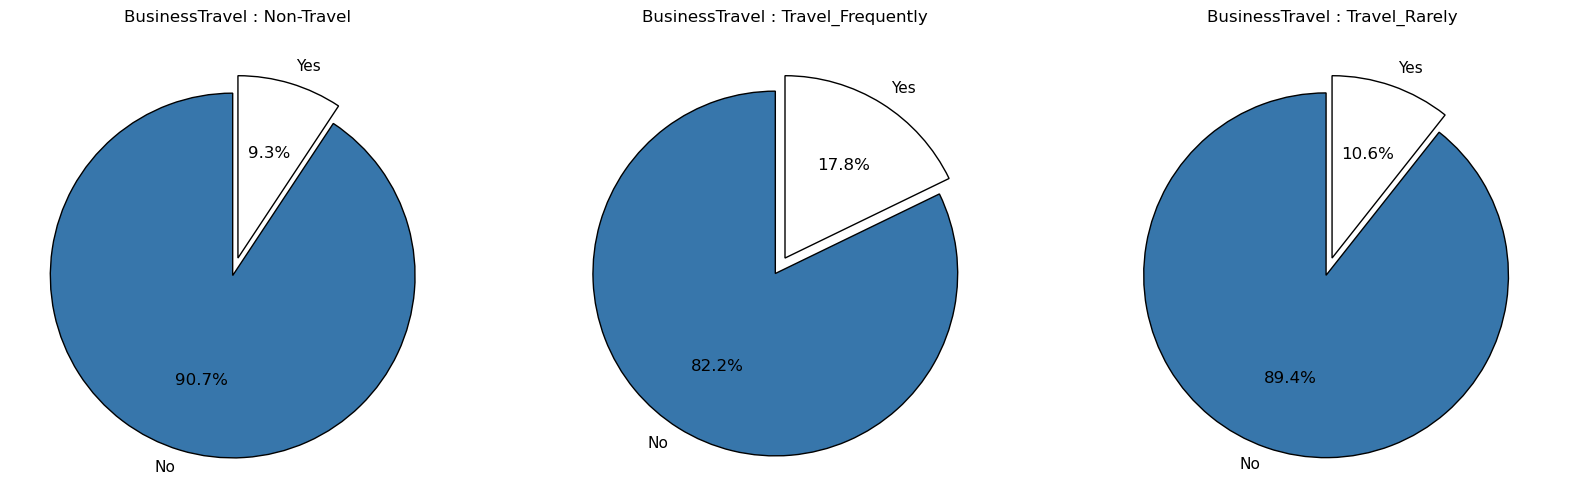

In [103]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (20,20))
for i in range(len(data['BusinessTravel'].unique())):
    plt.subplot(1,3,i+1)
    l = list(data.loc[(data['BusinessTravel'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    
    plt.pie(circle,labels = list(categories_encoded['Attrition'][k] for k in sorted(data['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(categories_encoded['BusinessTravel'][k] for k in sorted(data['BusinessTravel'].unique()))
    plt.title('BusinessTravel : ' + b[i]);

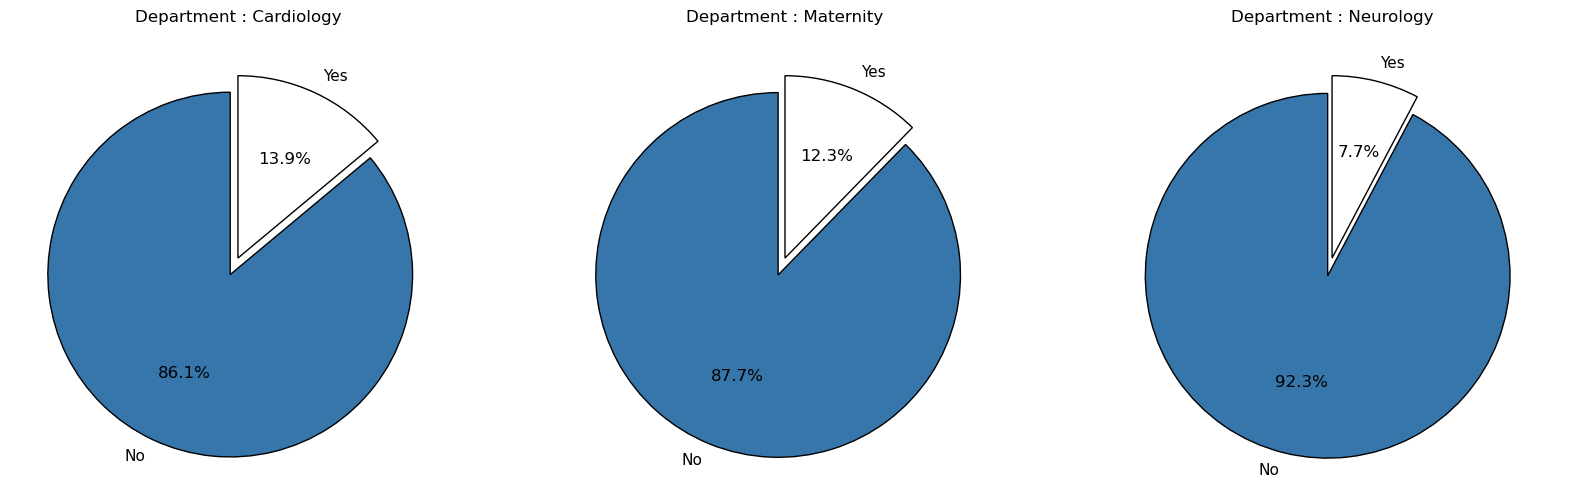

In [104]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (20,20))
for i in range(len(data['Department'].unique())):
    plt.subplot(1,3,i+1)
    l = list(data.loc[(data['Department'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    
    plt.pie(circle,labels = list(categories_encoded['Attrition'][k] for k in sorted(data['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(categories_encoded['Department'][k] for k in sorted(data['Department'].unique()))
    plt.title('Department : ' + b[i]);

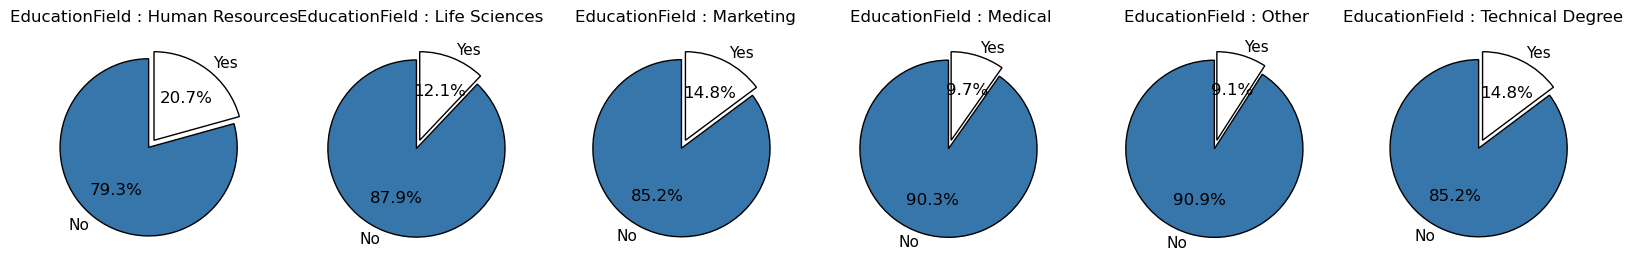

In [105]:
fig = plt.subplots(nrows = 1,ncols = 6,figsize = (20,20))
for i in range(len(data['EducationField'].unique())):
    plt.subplot(1,6,i+1)
    l = list(data.loc[(data['EducationField'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]
    
    plt.pie(circle,labels = list(categories_encoded['Attrition'][k] for k in sorted(data['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(categories_encoded['EducationField'][k] for k in sorted(data['EducationField'].unique()))
    plt.title('EducationField : ' + b[i]);

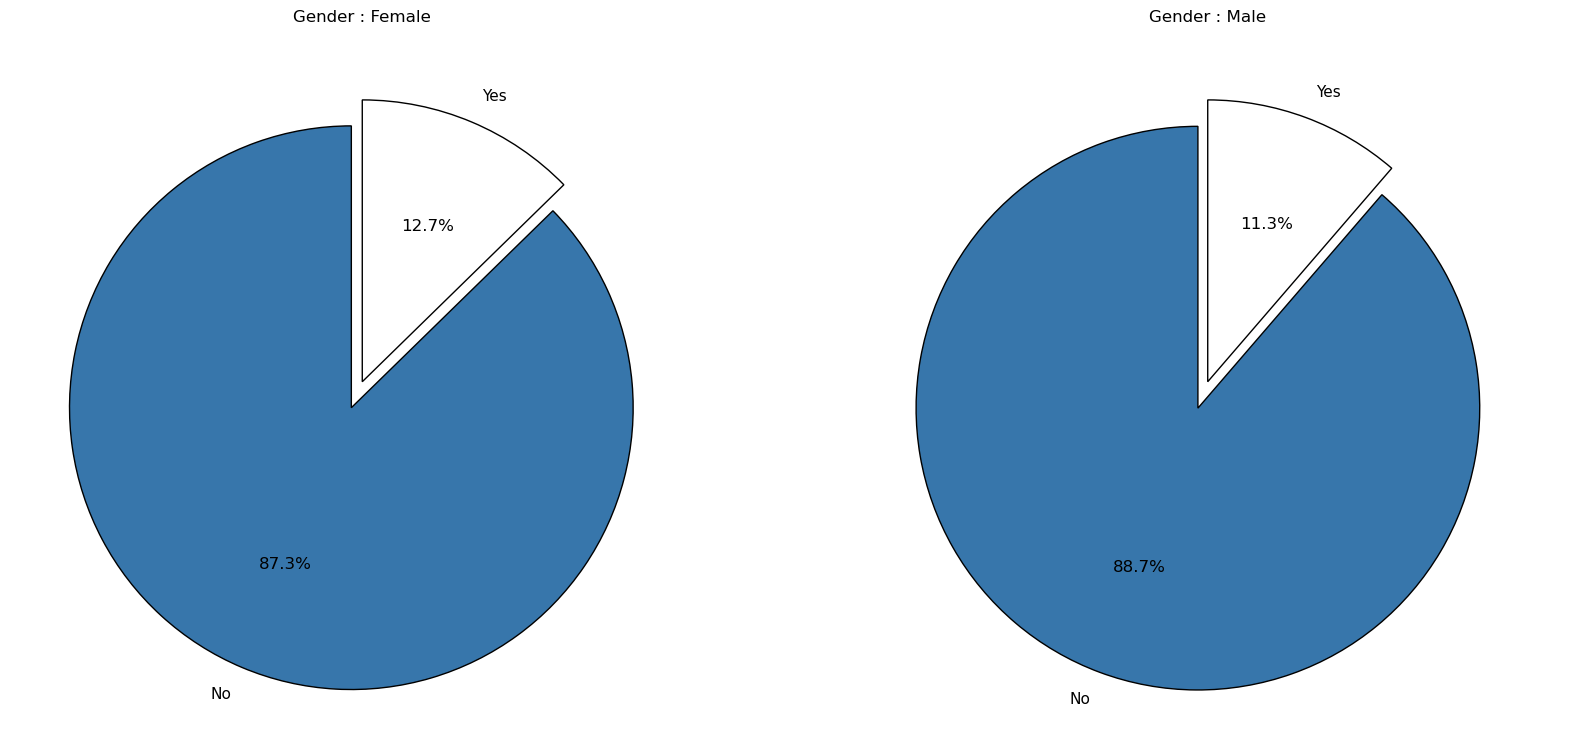

In [107]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,20))
for i in range(len(data['Gender'].unique())):
    plt.subplot(1,2,i+1)
    l = list(data.loc[(data['Gender'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    
    plt.pie(circle,labels = list(categories_encoded['Attrition'][k] for k in sorted(data['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(categories_encoded['Gender'][k] for k in sorted(data['Gender'].unique()))
    plt.title('Gender : ' + b[i]);

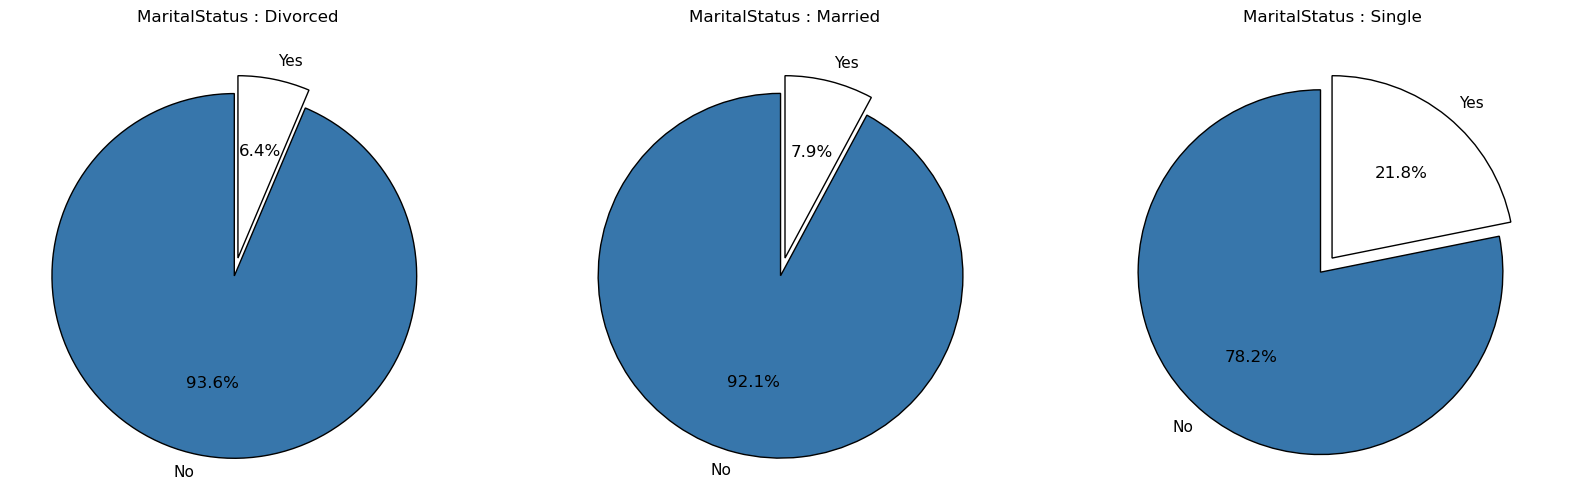

In [108]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (20,20))
for i in range(len(data['MaritalStatus'].unique())):
    plt.subplot(1,3,i+1)
    l = list(data.loc[(data['MaritalStatus'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    
    plt.pie(circle,labels = list(categories_encoded['Attrition'][k] for k in sorted(data['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(categories_encoded['MaritalStatus'][k] for k in sorted(data['MaritalStatus'].unique()))
    plt.title('MaritalStatus : ' + b[i]);

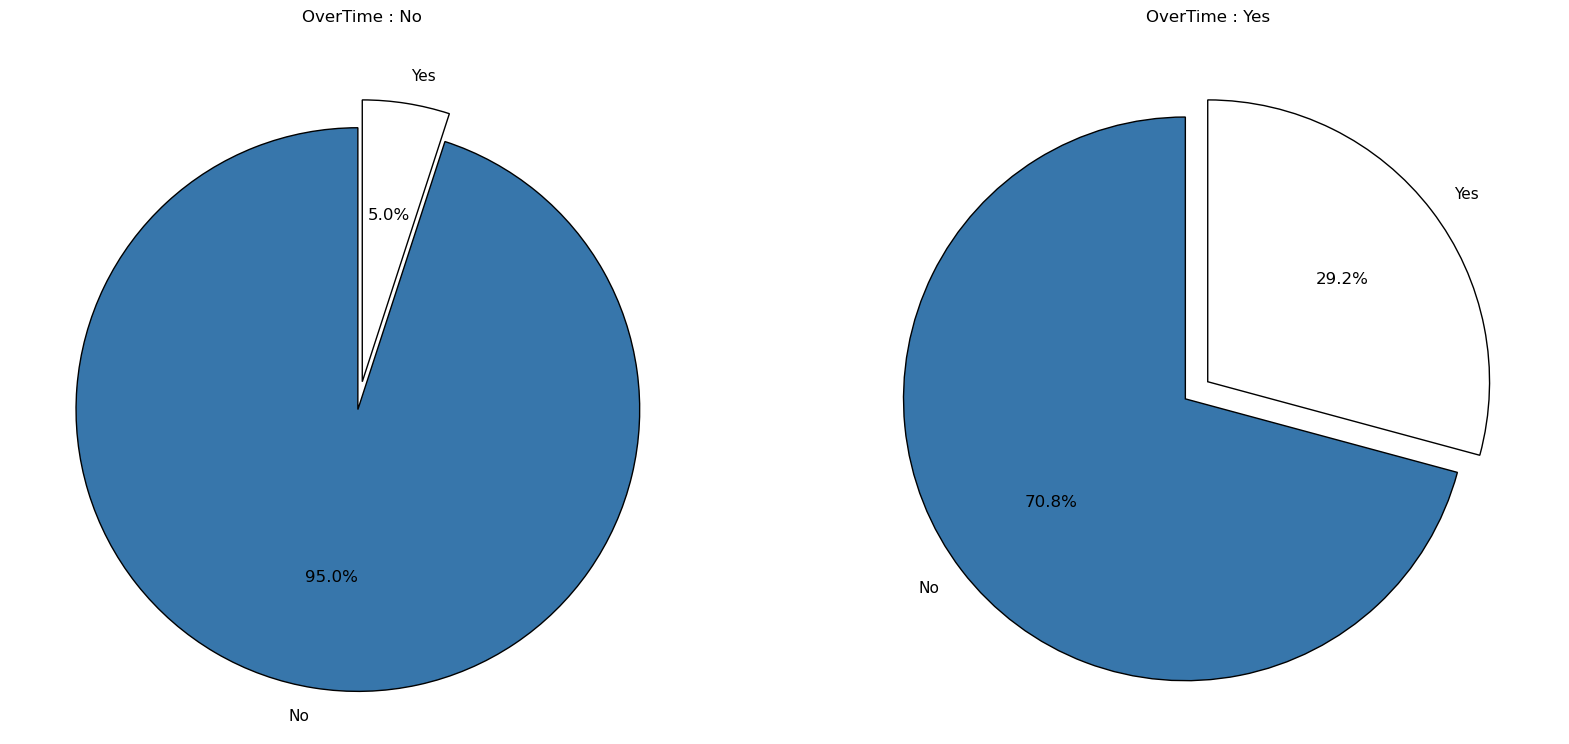

In [109]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,20))
for i in range(len(data['OverTime'].unique())):
    plt.subplot(1,2,i+1)
    l = list(data.loc[(data['OverTime'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

    plt.pie(circle,labels = list(categories_encoded['Attrition'][k] for k in sorted(data['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(categories_encoded['OverTime'][k] for k in sorted(data['OverTime'].unique()))
    plt.title('OverTime : ' + b[i]);

## Notes from categorical analysis
* More travel, more likelihood of leaving
* Less turnover in the Neurology department
* Human Resources degrees have more turnover
* Married employees are less likely to leave
* Employees who work overtime are far more likely to leave

## Scaling Data for Preprocessing

In [18]:
X = data.drop("Attrition",axis = 1)
y =  data["Attrition"]

cat_value = X.select_dtypes(exclude=np.number)

X = pd.get_dummies(X,columns=cat_value.columns)

X

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1313919,41,1102,1,2,1,2,94,3,2,...,0,1,0,0,0,0,1,1,0,1
1,1200302,49,279,8,1,1,3,61,2,2,...,0,0,1,0,0,1,0,1,1,0
2,1060315,37,1373,2,2,1,4,92,2,1,...,0,1,0,0,0,0,1,1,0,1
3,1272912,33,1392,3,4,1,4,56,3,1,...,0,0,1,0,0,1,0,1,0,1
4,1414939,27,591,2,1,1,1,40,3,1,...,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,471,24,3,1,3,66,1,1,...,0,1,0,0,0,0,1,1,0,1
1672,1152327,46,1125,10,3,1,3,94,2,3,...,0,1,0,0,0,1,0,1,0,1
1673,1812428,20,959,1,3,1,4,83,2,1,...,0,0,1,0,0,0,1,1,1,0
1674,1812429,39,466,1,1,1,4,65,2,4,...,0,0,0,1,0,1,0,1,1,0


In [19]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=21)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=21)

print("Train Shape:", X_train.shape, y_train.shape)
print("Validation set Shape:", X_val.shape,y_val.shape)
print("Test set Shape:", X_test.shape, y_test.shape)

Train Shape: (1173, 51) (1173,)
Validation set Shape: (251, 51) (251,)
Test set Shape: (252, 51) (252,)


In [20]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.head()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.13,-1.41,-1.16,1.39,-0.86,0.00,0.24,-0.45,-1.00,-0.95,...,-0.27,1.01,-0.68,-0.36,1.82,-0.94,-0.65,0.00,0.62,-0.62
1,0.28,-0.86,-0.93,-0.91,-0.86,0.00,-0.67,-1.10,0.38,-0.07,...,-0.27,1.01,-0.68,-0.36,-0.55,-0.94,1.53,0.00,0.62,-0.62
2,0.27,1.81,-0.38,-0.30,-0.86,0.00,-1.57,0.60,-1.00,0.82,...,-0.27,1.01,-0.68,-0.36,-0.55,1.06,-0.65,0.00,-1.61,1.61
3,1.68,-0.41,0.52,1.88,0.11,0.00,-1.57,-0.55,-1.00,-0.95,...,-0.27,-0.99,1.48,-0.36,-0.55,-0.94,1.53,0.00,-1.61,1.61
4,-1.59,1.48,0.15,-0.79,-0.86,0.00,-1.57,1.00,-1.00,-0.95,...,-0.27,-0.99,1.48,-0.36,-0.55,1.06,-0.65,0.00,-1.61,1.61


In [35]:
# Parameter tuning
grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)],
        'max_features': [None, 'sqrt'],
        'max_depth': [None, 5, 7, 14, 21],
        'min_samples_split': [2, 5, 8],
        'min_samples_leaf': [3, 4, 5],
        'bootstrap': [True, False]}

rf=RandomForestClassifier(random_state=92)
rf_cv=RandomizedSearchCV(estimator=rf, param_distributions=grid, scoring='roc_auc', 
                         n_iter=100, cv=5, random_state=92, n_jobs=-1)
rf_cv.fit(X_train, y_train)
print("Grid Search CV Best AUC = {:.3f}\nBest Params: {}".format(rf_cv.best_score_, rf_cv.best_estimator_))

Grid Search CV Best AUC = 0.928
Best Params: RandomForestClassifier(bootstrap=False, max_depth=7, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       random_state=92)


In [37]:
col=sns.color_palette("mako", 20).as_hex()[::-1]
feat=pd.DataFrame({"Importance": rf_cv.best_estimator_.feature_importances_}, index=X_train.columns
                 ).sort_values(by="Importance")
plot_df=feat.nlargest(34, columns='Importance').sort_values(by="Importance", ascending=False)
fig = px.bar(plot_df, x=plot_df.index, y='Importance', text='Importance', 
             color=plot_df.index, opacity=0.7, color_discrete_sequence=col)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside',
                  marker_line=dict(width=1, color='#3F3B3A'), 
                  hovertemplate='%{x}<br>Importance = %{y:.2f}')
fig.update_layout(title_text='Most Important Predictors of Employee Attrition', 
                  coloraxis_showscale=False, showlegend=False,font_color="#303030", height = 500,
                  paper_bgcolor='white', plot_bgcolor='white', yaxis_title="Importance", 
                  xaxis = dict(title="", showgrid=True, gridcolor="#f5f5f5"))
fig.show()

The employees currently logging OverTime are at risk to leave. Especially those who are younger and less established at the workplace